In [84]:
# Global Imports - Kjøres først
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Krever også at openpyxl er installer - kan installers ved å kjøre: python -m pip install openpyxl

In [85]:
# a)

# Leser inn inputfilen
file = 'support_uke_24.xlsx'

data = pd.read_excel(file)

print(data) # Få en oversikt over dataen

# Lager 4 arrays som skal holde hver sin kolonne
u_dag = data['Ukedag']. values
kl_slett = data['Klokkeslett']. values
varighet = data['Varighet']. values
score = data['Tilfredshet']. values

# print(u_dag.take(1), u_dag.take(70))
# print(kl_slett.take(1), kl_slett.take(70))
# print(varighet.take(1), varighet.take(70))
# print(score.take(0), score.take(70))


     Ukedag Klokkeslett  Varighet  Tilfredshet
0    Mandag    08:04:16  00:07:12          NaN
1    Mandag    08:04:53  00:02:49          6.0
2    Mandag    08:06:31  00:08:36          NaN
3    Mandag    08:11:21  00:04:34          NaN
4    Mandag    08:20:46  00:07:38          NaN
..      ...         ...       ...          ...
212  Fredag    15:06:52  00:11:12          NaN
213  Fredag    15:25:32  00:10:21          NaN
214  Fredag    15:30:39  00:07:16          NaN
215  Fredag    15:39:11  00:08:49          NaN
216  Fredag    15:56:10  00:10:13         10.0

[217 rows x 4 columns]


Antall mandager 51
Antall tirsdager 44
Antall onsdager 45
Antall torsdager 35
Antall fredager 42


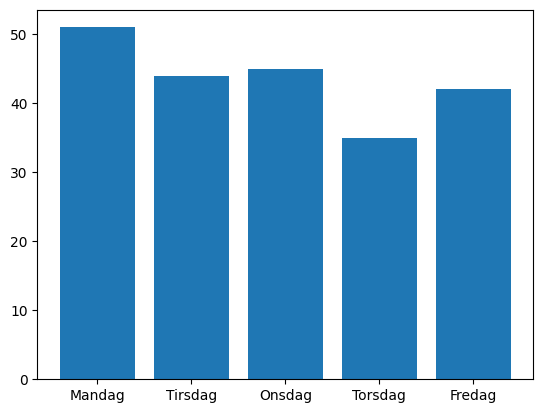

In [86]:
# b)

# Initialiserer variabler som skal holde antallet på de ulike ukedagene
# Disse blir oppdatert hver gang det er deres ukedag
mandag = 0
tirsdag = 0
onsdag = 0
torsdag = 0
fredag = 0

i = 0 # Initialiserer teller
while i < u_dag.size:
    if u_dag[i] == 'Mandag':
        mandag += 1
    if u_dag[i] == 'Tirsdag':
        tirsdag += 1
    if u_dag[i] == 'Onsdag':
        onsdag += 1
    if u_dag[i] == 'Torsdag':
        torsdag += 1
    if u_dag[i] == 'Fredag':
        fredag += 1
    i += 1

print('Antall mandager', mandag)
print('Antall tirsdager', tirsdag)
print('Antall onsdager', onsdag)
print('Antall torsdager', torsdag)
print('Antall fredager', fredag)

# Plotting av antallet
antall = [mandag, tirsdag, onsdag, torsdag, fredag]
navn = ('Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag')
plt.figure (1)
plt.bar(navn , antall)

plt.show()


In [87]:
# c)

# Finner indeksen til den korteste og til den lengste samtalen
tMax = np.argmax(varighet)
tMin = np.argmin(varighet)

# Henter opp veriden som tilsvarer de 2 indeksene jeg fant tidligere og tilegner til de til to nye variabler
lengste = varighet[tMax]
korteste = varighet[tMin]

print('Den korteste samtalen var', korteste)
print('Den lengste samtalen var', lengste)

Den korteste samtalen var 00:00:59
Den lengste samtalen var 00:11:28


In [88]:
# d)

i = 0 # Initialiserer teller
total_sekunder = 0

while i < varighet.size:
    # splitter på skilletegnet ':', slik at jeg får en variabel for timer, en for minutter og en for sekunder
    [timer , minutter, sekunder] = varighet[i].split(':')
    # Summerer opp antall sekunder for den enkelte samtalen
    antall_sekunder = int(timer) * 3600 + int(minutter) * 60 + int(sekunder)
    # Legger til antall sekunder for den enkelte samtalen til totalen så langt
    total_sekunder += antall_sekunder
    # Øker telleren for å gå videre til enste element
    i += 1

# Beregner snittid i sekunder
# Totale sekunder delt på antall observasjoner
gj_sekunder = (total_sekunder / varighet.size)

# Finner ut hvor mange ganger 60 går inn i 400
# Benytter numpy metoden floor for å fjerne alle desimaler for å få antall minutter
gj_minutter = np.floor(gj_sekunder / 60)

# Trekker så minutter med desimaler for å finne gjenværende rest
rest_tid = ((gj_sekunder / 60) - gj_minutter)

# Ganger da opp til slutt rest tid med antall sekunder for å regne ut hvor mange sekunder det tilsvarer
gj_sekunder = rest_tid * 60

print('Gjennomsnittlig samtaletid er', gj_minutter, 'minutter og', gj_sekunder, 'sekunder')

Gjennomsnittlig samtaletid er 6.0 minutter og 40.00921658986178 sekunder


In [ ]:
# e)


In [89]:
# f)
# Initialiserer tomme arrays
negative = np.array([])
positive = np.array([])

i = 0
while i < score.size:
    if score[i] <= 6:
        # Legger til negativ score i negativ array
        negative = np.append(negative, score[i]) 
    if score[i] >= 9:
        # Legger til positiv score i positiv array
        positive = np.append(positive, score[i])  
    i += 1

print('Negative kunders score', negative)
print('Positive kunders score', positive)

total_kunder = (negative.size + positive.size)
print('Totalt antall kunder', total_kunder)

andel_positive = positive.size /  total_kunder
andel_negative = negative.size /  total_kunder

print('Andel positive kunder', andel_positive)
print('Andel negative kunder', andel_negative)

nps = andel_positive - andel_negative

print('NPS er', nps * 100)

Negative kunders score [6. 3. 3. 5. 1. 1. 5. 2. 5. 1.]
Positive kunders score [10.  9. 10. 10.  9. 10. 10.  9.  9.  9. 10. 10. 10. 10. 10.  9. 10.  9.
 10. 10. 10.  9.  9. 10. 10. 10.  9. 10.]
Totalt antall kunder 38
Andel positive kunder 0.7368421052631579
Andel negative kunder 0.2631578947368421
NPS er 47.368421052631575
